In [1]:
import os
import sys
sys.path.insert(0,"/home/mohan/Projects/")
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from COSINE.simtools.utils import prng,pfft

In [36]:
niter=100
acclen=10000
nchan=4
mean_vals = np.zeros(niter,dtype="complex128")
std_vals = np.zeros(niter,dtype="complex128")
for i in range(niter):
    rng=prng.MultithreadedRNG(acclen*2*nchan)
    rng.fill()
    x=rng.values
    x=x.reshape(-1,2*nchan)
#     with pfft.parallelize_fft(8):
#         spec=pfft.cpfb(x,nchan=nchan)
    spec = np.fft.rfft(x,axis=1)
    mean_vals[i] = np.mean(spec[:,2])
    std_vals[i] = np.std(spec[:,2])

print("Expected stddev = ", np.sqrt(2*nchan))
# print("Obtained stddev = ", np.std(spec))

Expected stddev =  2.8284271247461903


In [37]:
print("expected stddev of mean", np.sqrt(2*nchan)/np.sqrt(spec.shape[0]))

expected stddev of mean 0.0282842712474619


In [38]:
np.std(mean_vals) # std is reduced by amount averaged over

0.0248108320620837

In [16]:
#np.std(spec[:,4])

2.845494602103205

In [35]:
# part 2, want to see stddev of timestream (autocorr(tau=0)) when generated using fourier modes.

niter=1000
osamp=4
N=2048*osamp
nchan=N//2
mean_vals = np.zeros(niter,dtype="complex128")
std_vals = np.zeros(niter,dtype="complex128")
snr = 100
k=50*osamp
dk=6*osamp
std_vals = []
for i in range(niter):
    f=np.zeros(N//2+1,dtype="complex128")
    rng=prng.MultithreadedRNG(N+2)
    rng.fill()
#     f[:]=(rng.values[:N//2+1] + 1j*rng.values[N//2+1:])
    f[k-dk//2:k+dk//2] = f[k-dk//2:k+dk//2] + np.sqrt(snr) * (np.random.randn(dk) + 1j * np.random.randn(dk))
    ts = np.sqrt(N)*np.fft.irfft(f)
#     std_vals.append(f[50]) # to make sure sigma of fourier modes is sqrt(2)
    std_vals.append(np.std(ts))

In [16]:
print("stddev of timestream obtained = ", np.mean(std_vals))
print("expected stddev without signal with white noise= ", np.sqrt(2/N)) #without signal
print("expected stddev with signal = ", np.sqrt(2*snr*dk*2/N**2)) #with signal only

stddev of timestream obtained =  0.016762267790753297
expected stddev without signal with white noise=  0.02209708691207961
expected stddev with signal =  0.01691455866766482


In [97]:
print("expected stddev = ", np.sqrt(2*snr*dk*2/N**2))

expected stddev =  0.023920798269366973


In [36]:
#with sqrt(N)
print("stddev of timestream obtained = ", np.mean(std_vals))
print("expected stddev = ", np.sqrt(2))
print("expected stddev with signal only = ", np.sqrt(4*snr*dk/N)) #with signal only

stddev of timestream obtained =  1.0746462657145148
expected stddev =  1.4142135623730951
expected stddev with signal only =  1.0825317547305484


In [5]:
f = np.zeros(513)
k = 50
f[k:k+3]=1
f[k-2:k]=1
finv = np.fft.irfft(f)
# f=np.sinc(10*np.arange(-1024,1024)/1024)
# ff = np.fft.rfft(f)

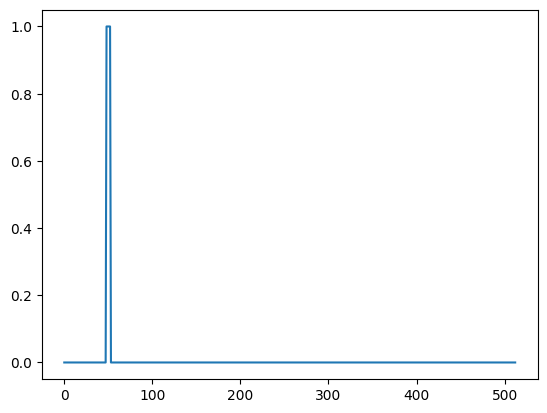

In [6]:
plt.plot(np.abs(f))

In [7]:
finv[0]

0.009765625

In [27]:
yy=np.cos(2*np.pi*50*np.arange(0,1024)/1024)*5*np.sinc(5*np.arange(0,1024)/1024)*2

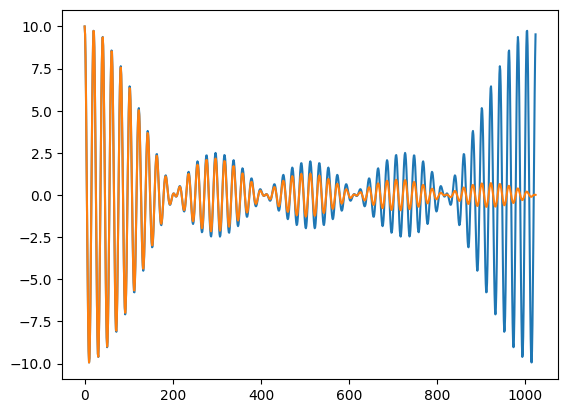

In [32]:
plt.plot(finv*1024)
plt.plot(yy)

In [17]:
finv*1024

array([10.        ,  9.53270149,  8.17461692, ...,  6.05305886,
        8.17461692,  9.53270149])

In [19]:
5*np.sinc(5*np.arange(0,513)/1024)*2 #for cosine

array([ 1.00000000e+01,  9.99960782e+00,  9.99843134e+00,  9.99647073e+00,
        9.99372626e+00,  9.99019831e+00,  9.98588740e+00,  9.98079412e+00,
        9.97491919e+00,  9.96826345e+00,  9.96082783e+00,  9.95261339e+00,
        9.94362127e+00,  9.93385276e+00,  9.92330923e+00,  9.91199216e+00,
        9.89990316e+00,  9.88704392e+00,  9.87341626e+00,  9.85902211e+00,
        9.84386349e+00,  9.82794253e+00,  9.81126149e+00,  9.79382270e+00,
        9.77562864e+00,  9.75668185e+00,  9.73698502e+00,  9.71654090e+00,
        9.69535238e+00,  9.67342245e+00,  9.65075417e+00,  9.62735075e+00,
        9.60321547e+00,  9.57835172e+00,  9.55276300e+00,  9.52645290e+00,
        9.49942512e+00,  9.47168345e+00,  9.44323178e+00,  9.41407411e+00,
        9.38421452e+00,  9.35365720e+00,  9.32240643e+00,  9.29046659e+00,
        9.25784216e+00,  9.22453768e+00,  9.19055784e+00,  9.15590737e+00,
        9.12059112e+00,  9.08461404e+00,  9.04798113e+00,  9.01069751e+00,
        8.97276840e+00,  